**EXP-8 Support Vector
Machines (SVMs) and the Kernel
Trick**

Name : Amishi Gupta

Roll No. 23/CS/048

In [3]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Total samples: 500
Training samples:350
Validation samples: 150


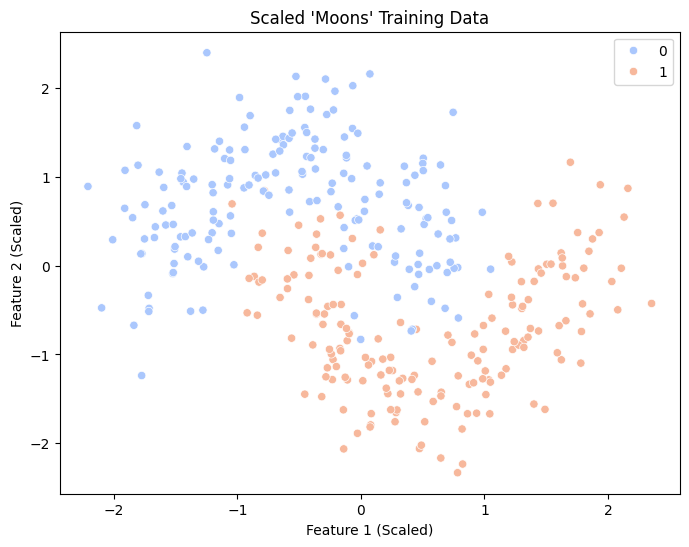

In [4]:
#Load Data
# Generate 500 samples
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

#70/30 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Total samples: {len(X)}")
print(f"Training samples:{len(X_train)}")
print(f"Validation samples: {len(X_val)}")

#Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Transform both X_train and X_val
X_val_scaled= scaler.transform(X_val)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette='coolwarm')
plt.title("Scaled 'Moons' Training Data")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

In [5]:
#Train Model
#Linear SVM
linear_model =SVC(kernel='linear', C=1.0, random_state=42)

#Fit the model
linear_model.fit(X_train_scaled, y_train)

#Make predictions on X_val_scaled
y_pred_linear = linear_model.predict(X_val_scaled)

print("Linear SVM Evaluation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_linear):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_linear))

Linear SVM Evaluation
Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [6]:
#RBF Kernel Model
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

#Fit the model
rbf_model.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_model.predict(X_val_scaled)

print("RBF Kernel SVM Evaluation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rbf))

#Polynomial Kernel Model
poly_model = SVC(kernel='poly', degree=3, random_state=42)

#Fit the model
poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_val_scaled)

print("\nPolynomial Kernel SVM Evaluation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_poly):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_poly))

RBF Kernel SVM Evaluation
Accuracy: 0.9467

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


Polynomial Kernel SVM Evaluation
Accuracy: 0.8733

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



In [7]:
#Accuracies for the report
acc_linear = accuracy_score(y_val, y_pred_linear)
acc_rbf = accuracy_score(y_val, y_pred_rbf)
acc_poly = accuracy_score(y_val, y_pred_poly)

#Comparison table
print("Model Accuracy Comparison")
comparison_data = {
    "Model": ["Linear SVM (C=1.0)", "RBF SVM (Default)", "Polynomial SVM (degree=3)"],
    "Validation Accuracy": [f"{acc_linear:.4f}", f"{acc_rbf:.4f}", f"{acc_poly:.4f}"]
}
print(pd.DataFrame(comparison_data).to_markdown(index=False))

Model Accuracy Comparison
| Model                     |   Validation Accuracy |
|:--------------------------|----------------------:|
| Linear SVM (C=1.0)        |                0.8533 |
| RBF SVM (Default)         |                0.9467 |
| Polynomial SVM (degree=3) |                0.8733 |


In [9]:
#Define Search Space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=2,
    cv=5,
    scoring='accuracy'
)

#Run Grid Search
print("\nRunning GridSearchCV")
grid.fit(X_train_scaled, y_train)

#Analyze Results
print("\nGridSearchCV Results")
print(f"Best Parameters Found: {grid.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid.best_score_:.4f}")


Running GridSearchCV
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .................

Final Model Evaluation on Hold-Out Set
Final Accuracy: 0.9667

Final Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Final Confusion Matrix:


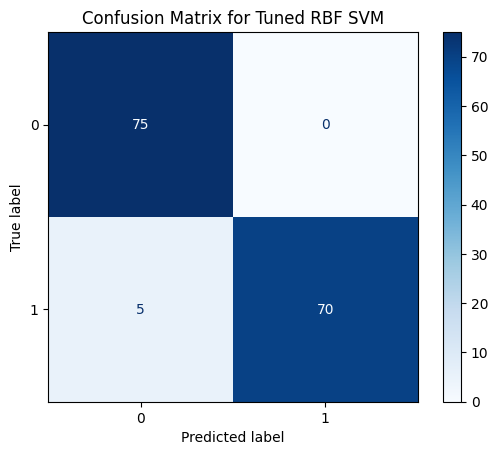

In [10]:
#Evaluate Final Model
print("Final Model Evaluation on Hold-Out Set")
final_predictions = grid.predict(X_val_scaled)

print(f"Final Accuracy: {accuracy_score(y_val, final_predictions):.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_val, final_predictions))

print("\nFinal Confusion Matrix:")
cm = confusion_matrix(y_val, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned RBF SVM")
plt.show()

#Final accuracy for the report
acc_final_tuned = accuracy_score(y_val, final_predictions)

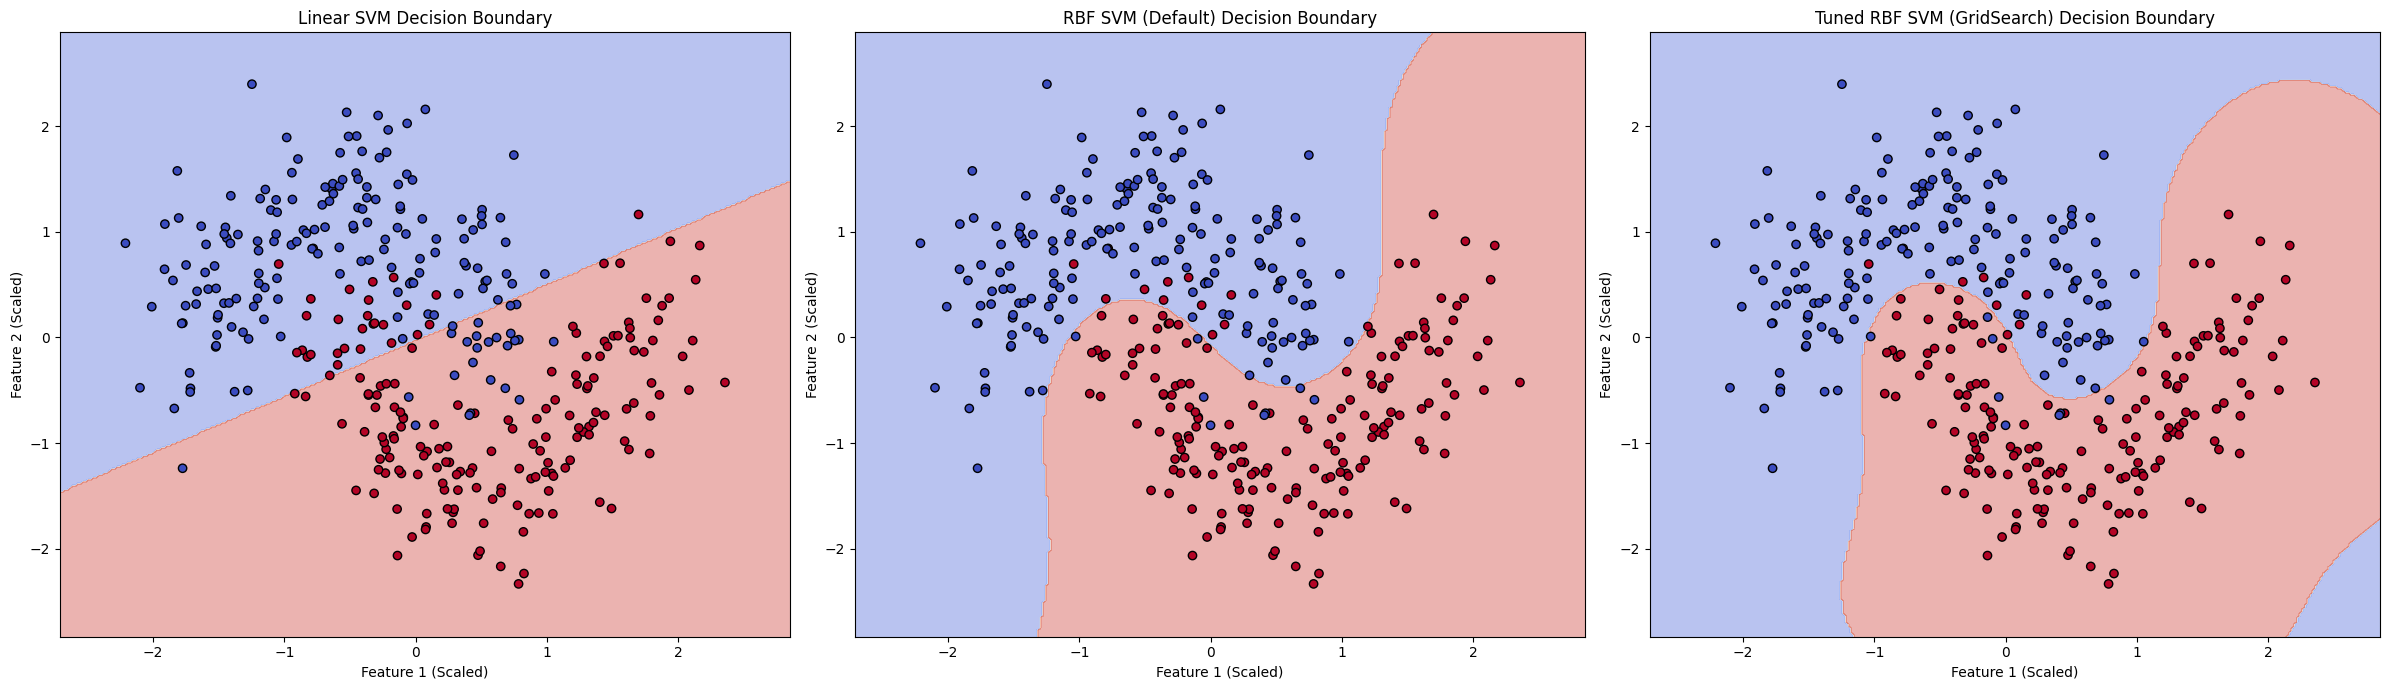

In [11]:
#Visualize Decision Boundaries
def plot_decision_boundary(model, ax, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1 (Scaled)")
    ax.set_ylabel("Feature 2 (Scaled)")

fig, axes = plt.subplots(1, 3, figsize=(24, 7))

#Linear SVM
plot_decision_boundary(linear_model, axes[0], X_train_scaled, y_train, "Linear SVM Decision Boundary")

#Default RBF SVM
plot_decision_boundary(rbf_model, axes[1], X_train_scaled, y_train, "RBF SVM (Default) Decision Boundary")

#Final Tuned RBF SVM (from GridSearchCV)
plot_decision_boundary(grid.best_estimator_, axes[2], X_train_scaled, y_train, "Tuned RBF SVM (GridSearch) Decision Boundary")

plt.tight_layout()
plt.show()